In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
auction = pd.read_csv("auction.csv")
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [3]:
auction.dtypes

auctionid         int64
bid             float64
bidtime         float64
bidder           object
bidderrate      float64
openbid         float64
price           float64
item             object
auction_type     object
dtype: object

Data Field Description

auctionid - unique identifier of an auction

bid - the proxy bid placed by a bidder

bidtime - the time (in days) that the bid was placed, from the start of the auction

bidder - eBay username of the bidder

bidderrate - eBay feedback rating of the bidder

openbid - the opening bid set by the seller

price - the closing price that the item sold for (equivalent to the second highest bid + an increment)

In [4]:
auction.shape

(10681, 9)

In [5]:
type(auction['item'])

pandas.core.series.Series

In [6]:
auction.dtypes

auctionid         int64
bid             float64
bidtime         float64
bidder           object
bidderrate      float64
openbid         float64
price           float64
item             object
auction_type     object
dtype: object

In [7]:
auction4 = auction[['auctionid', 'bid', 'price', 'auction_type']]

In [8]:
auction4.head()

,auctionid,bid,price,auction_type
0,1638893549,175.0,177.5,3 day auction
1,1638893549,100.0,177.5,3 day auction
2,1638893549,120.0,177.5,3 day auction
3,1638893549,150.0,177.5,3 day auction
4,1638893549,177.5,177.5,3 day auction


In [9]:
closing_price = auction4.groupby(['auctionid']).last()

# .last() compute the last values within each group

In [10]:
closing_price.head()

,bid,price,auction_type
auctionid,,,
1638843936,1625.0,1625.0,7 day auction
1638844284,500.0,500.0,7 day auction
1638844464,740.0,740.0,7 day auction
1638844729,320.0,320.0,7 day auction
1638893549,177.5,177.5,3 day auction


In [11]:
closing_price['check'] = np.where((closing_price['bid'] == closing_price['price']), closing_price['bid'], np.nan)
closing_price

,bid,price,auction_type,check
auctionid,,,,
1638843936,1625.00,1625.00,7 day auction,1625.00
1638844284,500.00,500.00,7 day auction,500.00
1638844464,740.00,740.00,7 day auction,740.00
1638844729,320.00,320.00,7 day auction,320.00
1638893549,177.50,177.50,3 day auction,177.50
...,...,...,...,...
8215558653,135.29,135.29,3 day auction,135.29
8215571039,150.00,150.00,3 day auction,150.00
8215582227,152.50,152.50,3 day auction,152.50


In [12]:
closing_price.isnull().sum()

bid               0
price             0
auction_type      0
check           146
dtype: int64

In [13]:
closing_price.shape

(628, 4)

In [14]:
1 - (146 / closing_price.shape[0])

0.7675159235668789

76.75% of bids are right before the auction ends which is same as the closing price.

**How many days does an auction usually take?**

In [15]:
auction1 = auction[['auctionid','bidtime']]
auction1.head()

,auctionid,bidtime
0,1638893549,2.230949
1,1638893549,2.600116
2,1638893549,2.600810
3,1638893549,2.601076
4,1638893549,2.909826


In [16]:
max_bidtime = auction1.groupby(['auctionid']).max()

max_bidtime.head()

,bidtime
auctionid,
1638843936,6.893113
1638844284,1.252407
1638844464,6.999745
1638844729,6.999213
1638893549,2.909826


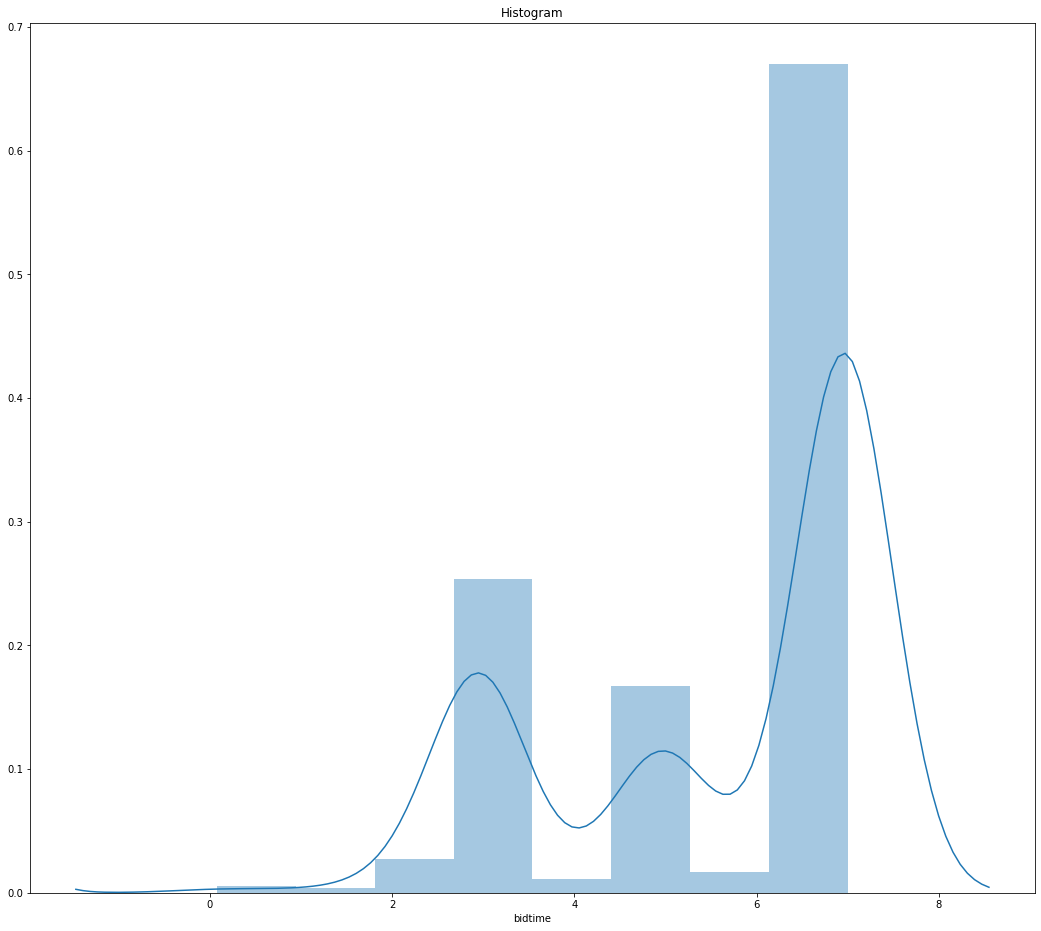

In [17]:
fig, ax = plt.subplots(figsize = (18, 16))

sns.distplot(max_bidtime['bidtime'], ax = ax)
ax.set_title("Histogram")
plt.show()

**From the histogram above we can see that most likely that auction will take 7 days and then 3 days and 5days.**

No. of unique auctions for different data types

In [18]:
num_type=auction.groupby('auction_type')['auctionid'].nunique().to_frame()

print(num_type)

               auctionid
auction_type            
3 day auction        148
5 day auction         96
7 day auction        384


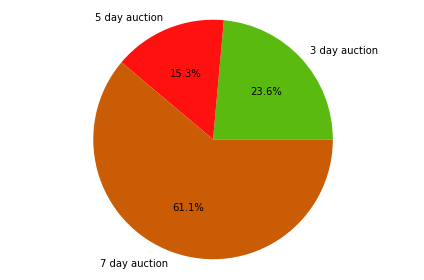

In [19]:
plt.pie(
    num_type['auctionid'],
    labels=num_type.index,
    shadow=False,
    colors=['#5ABA10', '#FE110E','#CA5C05'],
    autopct='%1.1f%%',
    )

plt.axis('equal')

plt.tight_layout()
plt.show()

Max bidtime for each unique auction

In [20]:
max_bidtime=auction.groupby('auctionid',as_index=False)['bidtime'].max()

max_bidtime.head()

,auctionid,bidtime
0,1638843936,6.893113
1,1638844284,1.252407
2,1638844464,6.999745
3,1638844729,6.999213
4,1638893549,2.909826


In [21]:
auction2 = auction[['auctionid', 'auction_type']]

auction2.tail()

,auctionid,auction_type
10676,8214889177,7 day auction
10677,8214889177,7 day auction
10678,8214889177,7 day auction
10679,8214889177,7 day auction
10680,8214889177,7 day auction


In [22]:
auction_type = auction2.groupby('auctionid', as_index = False)['auction_type'].first()

auction_type.head()

,auctionid,auction_type
0,1638843936,7 day auction
1,1638844284,7 day auction
2,1638844464,7 day auction
3,1638844729,7 day auction
4,1638893549,3 day auction


In [23]:
auction3 = pd.merge(max_bidtime, auction_type, how = 'inner', on = ['auctionid'])

auction3.head()

,auctionid,bidtime,auction_type
0,1638843936,6.893113,7 day auction
1,1638844284,1.252407,7 day auction
2,1638844464,6.999745,7 day auction
3,1638844729,6.999213,7 day auction
4,1638893549,2.909826,3 day auction


In [24]:
seven_day_auction = auction3.query('auction_type == "7 day auction"')
five_day_auction = auction3.query('auction_type == "5 day auction"')
three_day_auction = auction3.query('auction_type == "3 day auction"')

print(three_day_auction.shape, five_day_auction.shape, seven_day_auction.shape)

(148, 3) (96, 3) (384, 3)


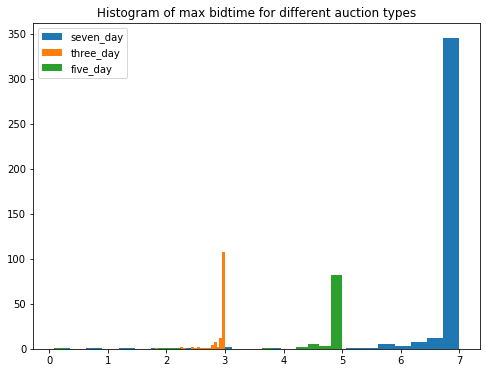

In [25]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.hist(seven_day_auction['bidtime'], bins=25, label='seven_day')
ax.hist(three_day_auction['bidtime'], bins=25, label='three_day')
ax.hist(five_day_auction['bidtime'], bins=25, label='five_day')
ax.set_title("Histogram of max bidtime for different auction types")
plt.legend()
plt.show()

# Analysis of Open Bid

In [26]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [27]:
open_bid = auction.groupby(['auctionid']).last()
open_bid=open_bid[['openbid','item','auction_type']]
open_bid.head()

,openbid,item,auction_type
auctionid,,,
1638843936,500.0,Cartier wristwatch,7 day auction
1638844284,200.0,Cartier wristwatch,7 day auction
1638844464,300.0,Cartier wristwatch,7 day auction
1638844729,225.0,Cartier wristwatch,7 day auction
1638893549,99.0,Cartier wristwatch,3 day auction


Create a boxplot first in order to have a more direct way of seeing means of open bid for different types.


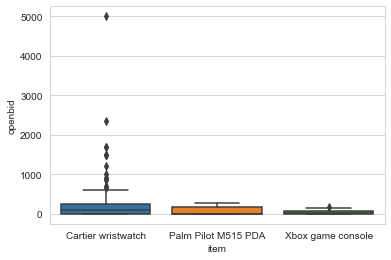

In [28]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="item", y="openbid", data=open_bid)

In [29]:
df=open_bid[open_bid['item']=='Cartier wristwatch']['openbid']
df.max()

5000.0

We can see that there's a Cartier wristwatch with an open bid of 5,000, which I think is very likely to bias my analysis of open bid. Therefore, I'm going to exclude that observation. **I'm not quite sure if I should do this though. I would appreciate your suggestion.**

In [32]:
#drop the row that has openbid=5000.0
value_list = [5000.0]
open_bid1=open_bid[~open_bid.openbid.isin(value_list)]
open_bid1.head()

,openbid,item,auction_type
auctionid,,,
1638843936,500.0,Cartier wristwatch,7 day auction
1638844284,200.0,Cartier wristwatch,7 day auction
1638844464,300.0,Cartier wristwatch,7 day auction
1638844729,225.0,Cartier wristwatch,7 day auction
1638893549,99.0,Cartier wristwatch,3 day auction


Distribution plot

<ipython-input-35-4d74ce128202>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(open_bid1[open_bid['item']=='Cartier wristwatch']['openbid'], kde=True,label="Cartier wristwatch")
<ipython-input-35-4d74ce128202>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(open_bid1[open_bid['item']=='Palm Pilot M515 PDA']['openbid'], kde=True,label="Palm Pilot M515 PDA")
<ipython-input-35-4d74ce128202>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(open_bid1[open_bid['item']=='Xbox game console']['openbid'], kde=True,label='Xbox game console')


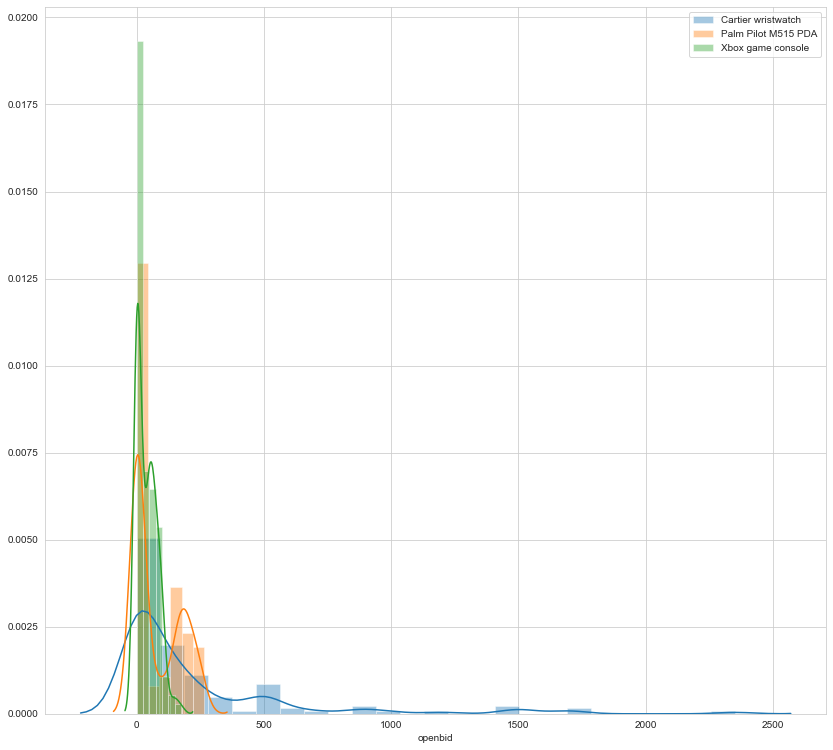

In [35]:
fig, ax = plt.subplots(figsize = (14, 13))
sns.distplot(open_bid1[open_bid['item']=='Cartier wristwatch']['openbid'], kde=True,label="Cartier wristwatch")
sns.distplot(open_bid1[open_bid['item']=='Palm Pilot M515 PDA']['openbid'], kde=True,label="Palm Pilot M515 PDA")
sns.distplot(open_bid1[open_bid['item']=='Xbox game console']['openbid'], kde=True,label='Xbox game console')
plt.legend()

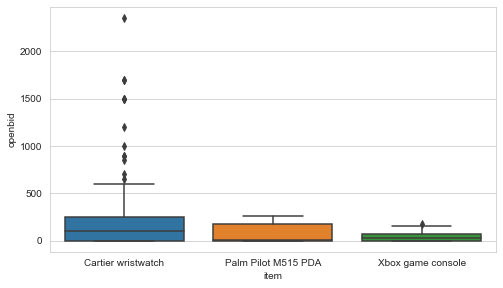

In [36]:
fig, ax = plt.subplots(figsize = (8, 4.5))
ax = sns.boxplot(x="item", y="openbid", data=open_bid1)

[(-20.0, 1000.0)]

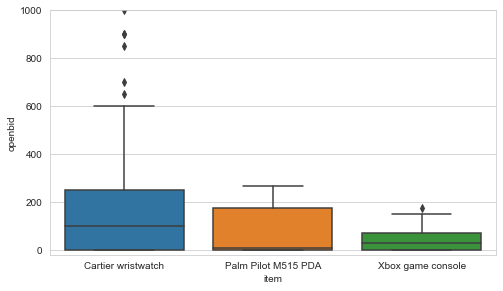

In [37]:
fig, ax = plt.subplots(figsize = (8, 4.5))
ax = sns.boxplot(x="item", y="openbid", data=open_bid1)
ax.set(ylim=(-20, 1000))

Since the distribution of open bid for Cartier wristwatch is skewed to the right, a median comparison of open bid price for different types of items is better.

In [39]:
open_bid1.groupby('item')['openbid'].median()

item
Cartier wristwatch     99.00
Palm Pilot M515 PDA     9.99
Xbox game console      29.99
Name: openbid, dtype: float64

In [40]:
open_bid1.groupby('item')['openbid'].mean()

item
Cartier wristwatch     231.961630
Palm Pilot M515 PDA     77.245044
Xbox game console       39.319060
Name: openbid, dtype: float64

In [41]:
open_bid1.groupby('item')['openbid'].var()

item
Cartier wristwatch     159414.387191
Palm Pilot M515 PDA      8409.336510
Xbox game console        1520.883494
Name: openbid, dtype: float64